<a href="https://colab.research.google.com/github/hifsakazmi/airquality-ols-svd-gradient-pca/blob/main/AirQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Air Quality Dataset (UCI)
* Dataset can be found [here](https://archive.ics.uci.edu/dataset/360/air+quality)
* Target: Predict CO (carbon monoxide) concentration
* Dataset size: 9k+
* Features: 15

## 1. Project Overview
The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2)  and were provided by a co-located reference certified analyzer. Missing values are tagged with -200 value.



## 2. Import Dataset

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np

# fetch dataset
air_quality = fetch_ucirepo(id=360)

# data (as pandas dataframes)
X = air_quality.data.features
#y = air_quality.data.targets

# metadata
#print(air_quality.metadata)

# variable information
#print(air_quality.variables)


In [ ]:
X.head(5)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


## 3. Data Description

In [ ]:
pd.set_option('display.max_colwidth', None)

air_quality.variables[['name', 'description']].style.set_table_styles(
    [{'selector': 'th, td', 'props': [('text-align', 'left')]}]
    ).hide(axis='index')


name,description
Date,None
Time,None
CO(GT),True hourly averaged concentration CO in mg/m^3 (reference analyzer)
PT08.S1(CO),hourly averaged sensor response (nominally CO targeted)
NMHC(GT),True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)
C6H6(GT),True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)
PT08.S2(NMHC),hourly averaged sensor response (nominally NMHC targeted)
NOx(GT),True hourly averaged NOx concentration in ppb (reference analyzer)
PT08.S3(NOx),hourly averaged sensor response (nominally NOx targeted)
NO2(GT),True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)


**Observations**
* Variable names ending with **(GT)** represent ground truth data. These variables can be target variables for regression.  
* Variable names beginning with **PT** represent nominally targeted sensor data.

In [ ]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
CO(GT),9357.0,-34.207524,77.657170,-200.0,0.6000,1.5000,2.6000,11.900
PT08.S1(CO),9357.0,1048.990061,329.832710,-200.0,921.0000,1053.0000,1221.0000,2040.000
NMHC(GT),9357.0,-159.090093,139.789093,-200.0,-200.0000,-200.0000,-200.0000,1189.000
C6H6(GT),9357.0,1.865683,41.380206,-200.0,4.0000,7.9000,13.6000,63.700
PT08.S2(NMHC),9357.0,894.595276,342.333252,-200.0,711.0000,895.0000,1105.0000,2214.000
NOx(GT),9357.0,168.616971,257.433866,-200.0,50.0000,141.0000,284.0000,1479.000
PT08.S3(NOx),9357.0,794.990168,321.993552,-200.0,637.0000,794.0000,960.0000,2683.000
NO2(GT),9357.0,58.148873,126.940455,-200.0,53.0000,96.0000,133.0000,340.000
PT08.S4(NO2),9357.0,1391.479641,467.210125,-200.0,1185.0000,1446.0000,1662.0000,2775.000
PT08.S5(O3),9357.0,975.072032,456.938184,-200.0,700.0000,942.0000,1255.0000,2523.000


## 4. Handling Missing Values

In this dataset, missing values are tagged with -200 value.

### 4.1. Replace missing value (-200) with NAN

In [ ]:
#Replace missing values with NAN
X = X.replace(-200, np.nan)

In [ ]:
# Get count of missing values per column
#df[(df == -200).any(axis=1)]
def get_missing_info(df):
  missing_counts = df.isna().sum()
  missing_percentages = (missing_counts / len(df)) * 100

  # Create a new DataFrame for the tabular display
  missing_info = pd.DataFrame({
      'Column Name': missing_counts.index,
      'Missing Values Count': missing_counts.values,
      'Missing Values Percentage %': missing_percentages.values
  })

  missing_info = missing_info[missing_info['Missing Values Count'] > 0]
  print(missing_info)


get_missing_info(X)

      Column Name  Missing Values Count  Missing Values Percentage %
2          CO(GT)                  1683                    17.986534
3     PT08.S1(CO)                   366                     3.911510
4        NMHC(GT)                  8443                    90.231912
5        C6H6(GT)                   366                     3.911510
6   PT08.S2(NMHC)                   366                     3.911510
7         NOx(GT)                  1639                    17.516298
8    PT08.S3(NOx)                   366                     3.911510
9         NO2(GT)                  1642                    17.548360
10   PT08.S4(NO2)                   366                     3.911510
11    PT08.S5(O3)                   366                     3.911510
12              T                   366                     3.911510
13             RH                   366                     3.911510
14             AH                   366                     3.911510


**Observations**
* **NMHC(GT)** column has more than **90%** missing values. Therefore, it makes sense to drop this column.
* Percentage of missing data in **CO(GT)**, **NOx(GT)** and **NO2(GT)** is less than **20%**. Since this is timeseries data, these missing values can be imputed through interpolation.
* For this project, target variable for regression is **CO(GT)**. Therefore, rows with missing target values should be dropped.
* In 366 rows (< 4% data), there are missing values in the following 9 columns which indicates sensor failure. Therefore, these rows will be dropped from the dataset.
  1. PT08.S1(CO)
  2. C6H6(GT)
  3. PT08.S2(NMHC)
  4. PT08.S3(NOx)
  5. PT08.S4(NO2)
  6. PT08.S5(O3)
  7. T
  8. RH
  9. AH

### 4.2. Dropping NMHC(GT) column

In [ ]:
X = X.drop('NMHC(GT)', axis=1)

### 4.3. Data Interpolation for NOx(GT), NO2(GT)

In [ ]:
X['NOx(GT)'] = X['NOx(GT)'].interpolate(method='linear')
X['NO2(GT)'] = X['NO2(GT)'].interpolate(method='linear')

### 4.4. Drop rows with missing target values (CO(GT))

In [ ]:
X = X.dropna(subset=['CO(GT)'])

### 4.5. Drop rows with high missing values

In [ ]:
get_missing_info(X)

      Column Name  Missing Values Count  Missing Values Percentage %
3     PT08.S1(CO)                   330                     4.300235
4        C6H6(GT)                   330                     4.300235
5   PT08.S2(NMHC)                   330                     4.300235
7    PT08.S3(NOx)                   330                     4.300235
9    PT08.S4(NO2)                   330                     4.300235
10    PT08.S5(O3)                   330                     4.300235
11              T                   330                     4.300235
12             RH                   330                     4.300235
13             AH                   330                     4.300235


In [ ]:
len(X[X['PT08.S1(CO)'].isnull() &
      X['C6H6(GT)'].isnull() &
      X['PT08.S2(NMHC)'].isnull() &
      X['PT08.S3(NOx)'].isnull() &
      X['PT08.S4(NO2)'].isnull() &
      X['PT08.S5(O3)'].isnull() &
      X['T'].isnull() &
      X['RH'].isnull() &
      X['AH'].isnull()])

330

In [ ]:
X = X.dropna(subset=['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)',
                     'PT08.S4(NO2)', 'PT08.S5(O3)',
                     'C6H6(GT)', 'T', 'RH', 'AH'])

In [ ]:
get_missing_info(X)

Empty DataFrame
Columns: [Column Name, Missing Values Count, Missing Values Percentage %]
Index: []


**Comment:** Now we do not have any missing values in the data. Therefore, inter-dependence of attributes can be analyzed.  

## 5. Graphical Analysis

### 5.1. Visualize Distributions

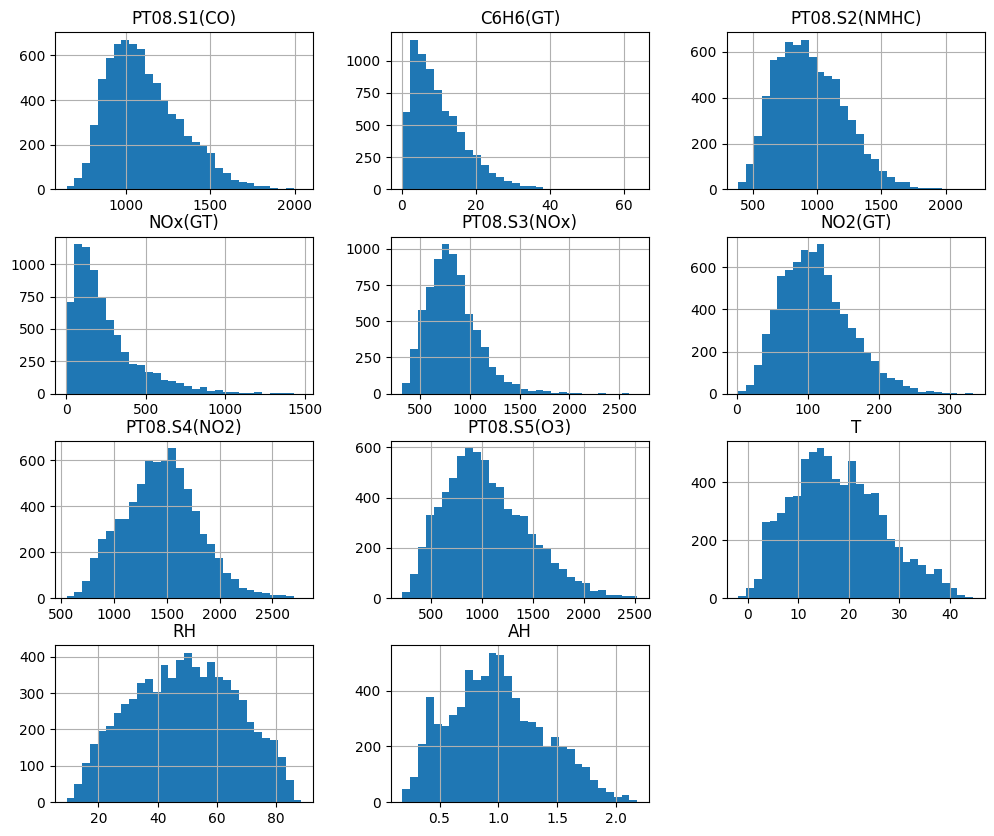

In [ ]:
import matplotlib.pyplot as plt
X.hist(bins=30, figsize=(12,10))
plt.show()


### 5.2. Correlation Matrix

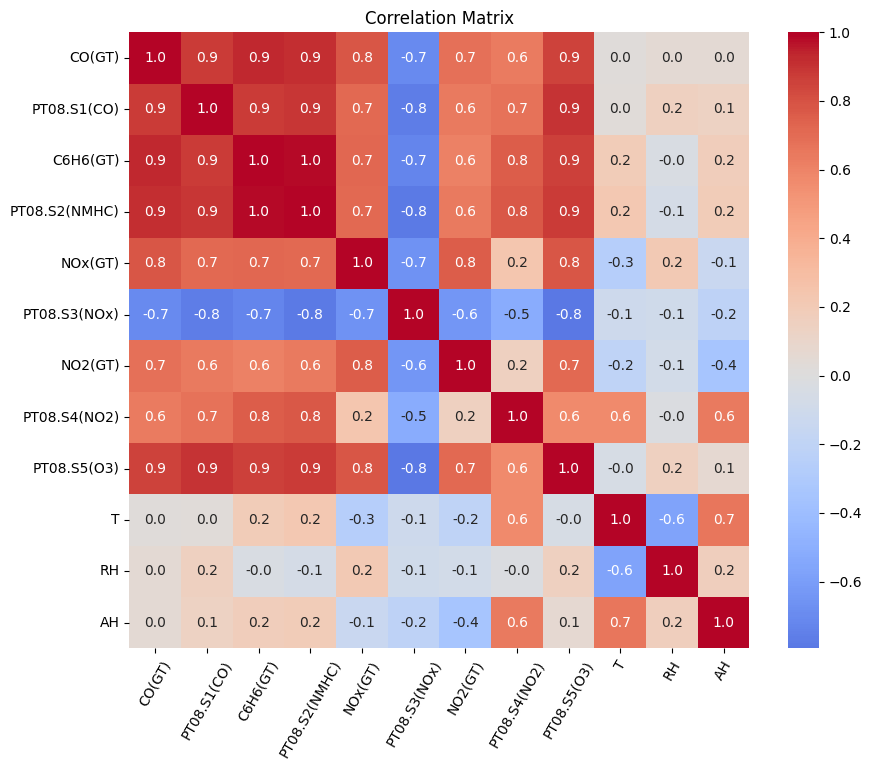

In [ ]:
import seaborn as sns

corr = X.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".1f",
    cmap="coolwarm",
    center=0
)
plt.title("Correlation Matrix")
plt.xticks(rotation=60)
plt.show()

**Observations:**
* There is a strong postive correlation between CO(GT) and sensor data (PT08.S1(CO), PT08.S2(NMHC), PT08.S4(NO2), PT08.S5(O3)).
* There is a strong negative correlation (-0.7) between CO(GT) and PT08.S3(NOx)
* There is almost no correlation between CO(GT) and environmental variables (T, RH, AH)

In [ ]:
#X[['CO(GT)', 'T', 'RH', 'AH']].corr()

## 6. Data Preparation and Scaling

### 6.1. Set Target Variable

In [ ]:
y = X['CO(GT)']
X = X.drop('CO(GT)', axis=1)

### 6.2. Set Input Features


In [ ]:
features = [
    'PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)',
    'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH'
]

X_features = X[features]

### 6.3. Scaling input features

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_array = scaler.fit_transform(X_features)  # sensors + environment

X_features = pd.DataFrame(
    X_array,
    columns=X_features.columns,
    index=X_features.index)

### 6.4. Data distribution after scaling



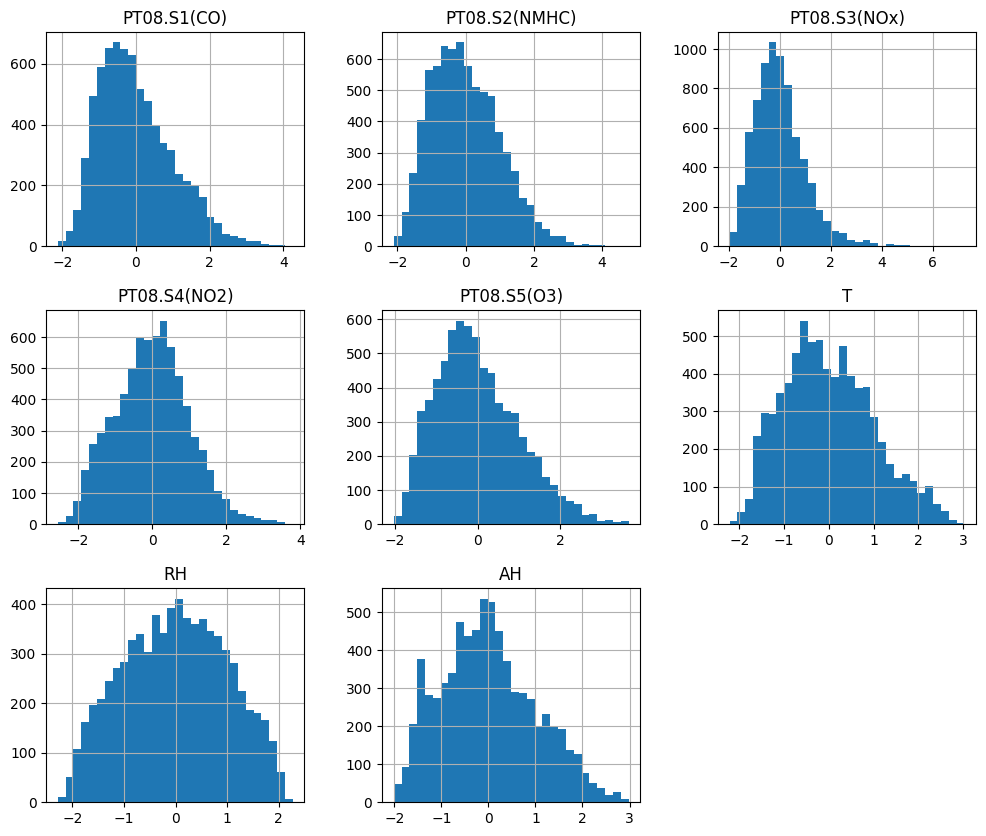

In [ ]:
X_features.hist(bins=30, figsize=(12,10))
plt.show()

### 6.5. Add Bias Term to Input Features

In [ ]:
# Add bias to np array
X_array_bias = np.hstack([np.ones((X_array.shape[0], 1)), X_array])

In [ ]:
# Add bian to pd dataframe
X_features_bias = X_features.copy()
X_features_bias.insert(0, 'bias', 1)

This data can now be used for regression analysis.

## 7. Ordinary Least Squares (Closed-form)

## 8. Least Squares using SVD

## 9. Gradient Descent Implementation

In [ ]:
# Convert y (target) to a column vector (N x 1) for matrix algebra
y_target = y.values.reshape(-1, 1)

print(f"Data ready for GD. X_final shape: {X_features_bias.shape}, y_target shape: {y_target.shape}")

print(f"Data ready for GD. X_final shape: {X_features.shape}, y_target shape: {y_target.shape}")
print("-" * 50)

Data ready for GD. X_final shape: (7344, 9), y_target shape: (7344, 1)
Data ready for GD. X_final shape: (7344, 8), y_target shape: (7344, 1)
--------------------------------------------------


In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt
from numpy.linalg import inv
import pandas as pd

### 9.1 MEAN SQUARE ERROR
MSE is used for Gradient Descent because it is a convex function with a single minimum, guaranteeing that GD will find the optimal solution. It is also easily differentiable, which is required to calculate the gradient (slope) at every step.





*   Convexity: The MSE loss function is convex, guaranteeing a single global minimum. This ensures that Gradient Descent will always find the best set of weights ($\mathbf{\beta}$) without getting stuck in local minima.
*   Differentiability: MSE is a smooth, continuous function. This allows for easy and accurate calculation of the gradient (the slope) at every point, which is essential for Gradient Descent to determine the direction of optimization.
*   Error Penalty: By squaring the errors, MSE heavily penalizes large mistakes. This encourages the model to fit all data points robustly rather than ignoring outliers.


In [ ]:
def mse_loss(X, y, beta):
    "Mean Square Loss"
    m = len(y)
    predictions = X.dot(beta)
    errors = predictions - y
    #axis=0 to ensure scalar sum and .item() for scalar return
    mse = (1/m) * np.sum(errors**2, axis=0)
    return mse.item()

### 9.2 ANALYTICAL SOLUTION (OLS / Normal Equation)

In [ ]:
def ols_analytical(X, y):
    """weights calculation using the Normal Equation (Closed-Form Solution)."""
    start_time = time.time()
    XTX_inv = inv(X.T.dot(X))
    XTy = X.T.dot(y)
    beta = XTX_inv.dot(XTy)
    runtime = time.time() - start_time
    return beta, runtime

### 9.3 BATCH GRADIENT DESCENT (BGD)

βk+1 = βk − η∇L(βk)

In [ ]:
def batch_gradient_descent(X, y, learning_rate, n_iterations):
    """Batch Gradient Descent."""
    m = len(y)
    n_features = X.shape[1]
    beta = np.zeros((n_features, 1))
    loss_history = []
    start_time = time.time()

    for iteration in range(n_iterations):
        errors = X.dot(beta) - y
        gradient = (2/m) * X.T.dot(errors)
        beta = beta - learning_rate * gradient
        loss_history.append(mse_loss(X, y, beta))

    if isinstance(beta, pd.DataFrame):
        beta = beta.values
    runtime = time.time() - start_time
    return beta, loss_history, runtime

### 9.4 STOCHASTIC GRADIENT DESCENT (SGD) - ROBUST VERSION

In [ ]:
def stochastic_gradient_descent(X, y, learning_rate, n_epochs):
    """Stochastic Gradient Descent with robust indexing."""
    m = len(y)
    n_features = X.shape[1]
    beta = np.zeros((n_features, 1))
    loss_history = []
    start_time = time.time()

    for epoch in range(n_epochs):
        # Shuffle data indices
        shuffled_indices = np.random.permutation(m)

        # simple positional slicing for shuffling
        # because the inputs X and y were stripped of Pandas indices.
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        for i in range(m): # Iterate over every single sample
            xi = X_shuffled[i:i+1] # Shape (1, D)
            yi = y_shuffled[i:i+1] # Shape (1, 1)

            error = xi.dot(beta) - yi
            gradient = 2 * xi.T.dot(error)
            beta = beta - learning_rate * gradient

        loss_history.append(mse_loss(X, y, beta))

    if isinstance(beta, pd.DataFrame):
        beta = beta.values
    runtime = time.time() - start_time
    return beta, loss_history, runtime

### 9.5 ADAM OPTIMIZER

In [ ]:
def adam_optimizer(X, y, learning_rate, n_iterations, beta1=0.9, beta2=0.999, epsilon=1e-8):
    """optimization using the Adam algorithm."""
    m = len(y)
    n_features = X.shape[1]
    beta = np.zeros((n_features, 1))
    m_t = np.zeros((n_features, 1))
    v_t = np.zeros((n_features, 1))
    loss_history = []
    start_time = time.time()

    for t in range(1, n_iterations + 1):
        errors = X.dot(beta) - y
        gradients = (2/m) * X.T.dot(errors)

        m_t = beta1 * m_t + (1 - beta1) * gradients
        v_t = beta2 * v_t + (1 - beta2) * (gradients ** 2)

        m_hat = m_t / (1 - beta1**t)
        v_hat = v_t / (1 - beta2**t)

        beta -= learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)
        loss_history.append(mse_loss(X, y, beta))

    if isinstance(beta, pd.DataFrame):
        beta = beta.values
    runtime = time.time() - start_time
    return beta, loss_history, runtime

### 9.6 EXECUTION & COMPARISON

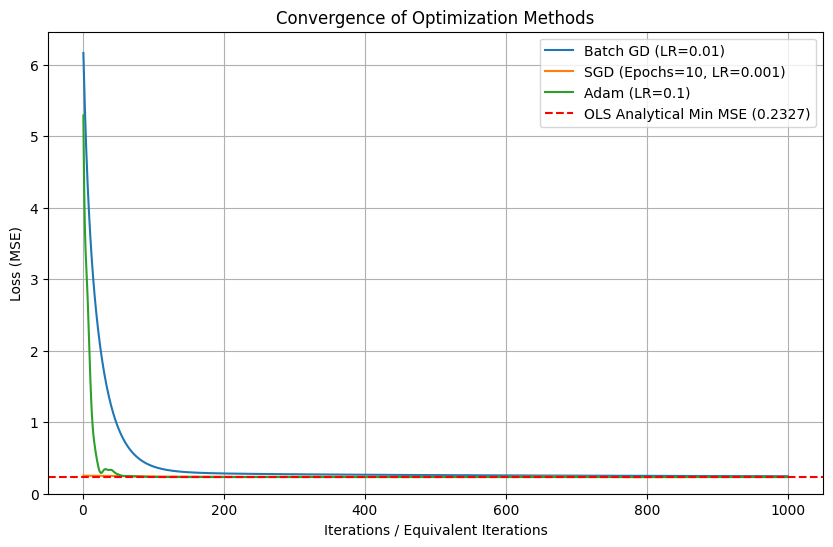


                 MODEL ACCURACY, RUNTIME & CONVERGENCE COMPARISON                 
| Method            |   Final MSE Loss |   Runtime (s) |
|:------------------|-----------------:|--------------:|
| OLS (Analytical)  |           0.2327 |        0.0008 |
| Batch GD (k=1000) |           0.2448 |        0.1665 |
| SGD (E=10)        |           0.2350 |        0.4665 |
| Adam (k=1000)     |           0.2327 |        0.2580 |

Final Weights (First 5 components: Bias, Feature 1, ..., Feature 4)
OLS Beta:  [ 2.12971133  0.38889366  1.37332931  0.20471723 -0.19617887]
Adam Beta: [ 2.12971133  0.38889366  1.37332931  0.20471723 -0.19617887]


In [ ]:
try:
    #Ensure X_f and y_t are pure, index-less NumPy arrays
    X_f = np.ascontiguousarray(X_features_bias, dtype=np.float64)
    y_t = np.ascontiguousarray(y_target, dtype=np.float64)

    # --- Run Models ---
    GD_LR = 0.01; GD_ITER = 1000
    SGD_LR = 0.001; SGD_EPOCHS = 10
    ADAM_LR = 0.1; ADAM_ITER = 1000

    beta_ols, time_ols = ols_analytical(X_f, y_t)
    loss_ols = mse_loss(X_f, y_t, beta_ols)

    beta_bgd, loss_history_bgd, time_bgd = batch_gradient_descent(X_f, y_t, GD_LR, GD_ITER)
    beta_sgd, loss_history_sgd, time_sgd = stochastic_gradient_descent(X_f, y_t, SGD_LR, SGD_EPOCHS)
    beta_adam, loss_history_adam, time_adam = adam_optimizer(X_f, y_t, ADAM_LR, ADAM_ITER)

    # PLOT LOSS CURVES

    plt.figure(figsize=(10, 6))

    plt.plot(range(1, GD_ITER + 1), loss_history_bgd, label=f"Batch GD (LR={GD_LR})")

    # Scale SGD epochs to equivalent iterations for fair comparison on plot
    plt.plot(np.linspace(1, GD_ITER, len(loss_history_sgd)), loss_history_sgd, label=f"SGD (Epochs={SGD_EPOCHS}, LR={SGD_LR})")

    plt.plot(range(1, ADAM_ITER + 1), loss_history_adam, label=f"Adam (LR={ADAM_LR})")

    plt.axhline(y=loss_ols, color='r', linestyle='--', label=f'OLS Analytical Min MSE ({loss_ols:.4f})')

    plt.xlabel("Iterations / Equivalent Iterations")
    plt.ylabel("Loss (MSE)")
    plt.title("Convergence of Optimization Methods")
    plt.legend()
    plt.grid(True)
    plt.ylim(bottom=0)
    plt.show()

    # RESULTS COMPARISON

    results = pd.DataFrame({
        'Method': ['OLS (Analytical)', f'Batch GD (k={GD_ITER})', f'SGD (E={SGD_EPOCHS})', f'Adam (k={ADAM_ITER})'],
        'Final MSE Loss': [loss_ols, loss_history_bgd[-1], loss_history_sgd[-1], loss_history_adam[-1]],
        'Runtime (s)': [time_ols, time_bgd, time_sgd, time_adam]
    })

    print("\n" + "="*70)
    print("                 MODEL ACCURACY, RUNTIME & CONVERGENCE COMPARISON                 ")
    print("="*70)
    print(results.to_markdown(index=False, floatfmt=".4f"))
    print("\n" + "="*70)
    print("Final Weights (First 5 components: Bias, Feature 1, ..., Feature 4)")
    print(f"OLS Beta:  {beta_ols.flatten()[:5]}")
    print(f"Adam Beta: {beta_adam.flatten()[:5]}")
    print("="*70)

except NameError:
    print("Stuck in Error")

### 9.7 With Different Learning Rates


Running BGD Learning Rate Experiment...
LR 0.2: Final MSE = 0.2328 | Runtime = 0.0286s
LR 0.1: Final MSE = 0.2352 | Runtime = 0.0410s
LR 0.01: Final MSE = 0.2832 | Runtime = 0.0293s
LR 0.001: Final MSE = 2.4822 | Runtime = 0.0287s
LR 0.0001: Final MSE = 5.7934 | Runtime = 0.0283s


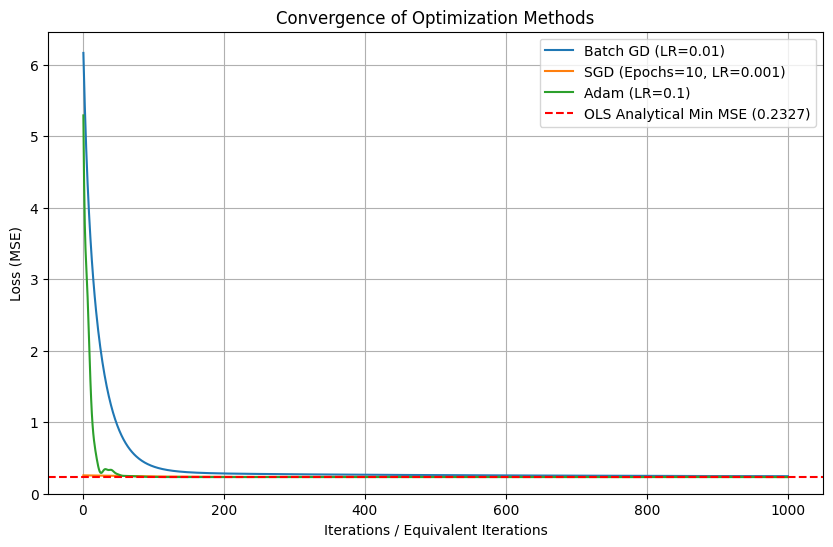

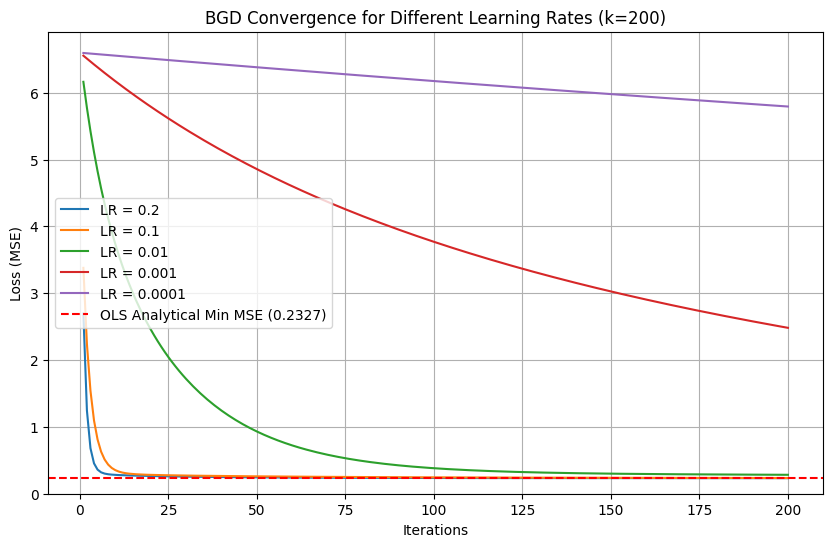


                 MODEL ACCURACY, RUNTIME & CONVERGENCE COMPARISON                 
| Method            |   Final MSE Loss |   Runtime (s) |
|:------------------|-----------------:|--------------:|
| OLS (Analytical)  |           0.2327 |        0.0006 |
| Batch GD (k=1000) |           0.2448 |        0.1469 |
| SGD (E=10)        |           0.2332 |        0.4571 |
| Adam (k=1000)     |           0.2327 |        0.1889 |

Final Weights (First 5 components: Bias, Feature 1, ..., Feature 4)
OLS Beta:  [ 2.12971133  0.38889366  1.37332931  0.20471723 -0.19617887]
Adam Beta: [ 2.12971133  0.38889366  1.37332931  0.20471723 -0.19617887]


In [ ]:
try:
    X_f = np.ascontiguousarray(X_features_bias, dtype=np.float64)
    y_t = np.ascontiguousarray(y_target, dtype=np.float64)

    GD_LR = 0.01; GD_ITER = 1000
    SGD_LR = 0.001; SGD_EPOCHS = 10
    ADAM_LR = 0.1; ADAM_ITER = 1000

    beta_ols, time_ols = ols_analytical(X_f, y_t)
    loss_ols = mse_loss(X_f, y_t, beta_ols)

    beta_bgd, loss_history_bgd, time_bgd = batch_gradient_descent(X_f, y_t, GD_LR, GD_ITER)
    beta_sgd, loss_history_sgd, time_sgd = stochastic_gradient_descent(X_f, y_t, SGD_LR, SGD_EPOCHS)
    beta_adam, loss_history_adam, time_adam = adam_optimizer(X_f, y_t, ADAM_LR, ADAM_ITER)

    # BGD with Different Learning Rates

    EXPERIMENTAL_LRS = [0.2, 0.1, 0.01, 0.001, 0.0001]
    EXP_ITERATIONS = 200  # Shorter run for clearer comparison of initial convergence
    loss_histories_exp = {}

    print("\n" + "="*50)
    print("Running BGD Learning Rate Experiment...")
    print("="*50)

    for lr in EXPERIMENTAL_LRS:
        # Re-run BGD for a shorter iteration count
        beta, loss_history, runtime = batch_gradient_descent(X_f, y_t, lr, EXP_ITERATIONS)
        loss_histories_exp[lr] = loss_history
        print(f"LR {lr}: Final MSE = {loss_history[-1]:.4f} | Runtime = {runtime:.4f}s")
        if not np.isfinite(loss_history[-1]):
            print(f"  --> WARNING: Loss diverged or overflowed for LR={lr}")


    # =======================================================
    # PLOT 1: Optimization Method Comparison (Original Plot)
    # =======================================================
    plt.figure(figsize=(10, 6))

    plt.plot(range(1, GD_ITER + 1), loss_history_bgd, label=f"Batch GD (LR={GD_LR})")
    plt.plot(np.linspace(1, GD_ITER, len(loss_history_sgd)), loss_history_sgd, label=f"SGD (Epochs={SGD_EPOCHS}, LR={SGD_LR})")
    plt.plot(range(1, ADAM_ITER + 1), loss_history_adam, label=f"Adam (LR={ADAM_LR})")

    plt.axhline(y=loss_ols, color='r', linestyle='--', label=f'OLS Analytical Min MSE ({loss_ols:.4f})')

    plt.xlabel("Iterations / Equivalent Iterations")
    plt.ylabel("Loss (MSE)")
    plt.title("Convergence of Optimization Methods")
    plt.legend()
    plt.grid(True)
    plt.ylim(bottom=0)
    plt.show() # Display Plot 1

    # =======================================================
    # PLOT 2 : Learning Rate Comparison
    # =======================================================
    plt.figure(figsize=(10, 6))

    for lr, history in loss_histories_exp.items():
        # Checking for convergence/divergence before plotting
        if np.isfinite(history).all():
            plt.plot(range(1, len(history) + 1), history, label=f'LR = {lr}')
        else:
            # Plotting finite part or skip if it diverges immediately
            finite_history = np.array(history)[np.isfinite(history)]
            if len(finite_history) > 1:
                 plt.plot(range(1, len(finite_history) + 1), finite_history, label=f'LR = {lr} (Diverged Early)', linestyle=':')
            else:
                 plt.plot([], [], label=f'LR = {lr} (Diverged)')


    plt.axhline(y=loss_ols, color='r', linestyle='--', label=f'OLS Analytical Min MSE ({loss_ols:.4f})')

    plt.title(f"BGD Convergence for Different Learning Rates (k={EXP_ITERATIONS})")
    plt.xlabel("Iterations")
    plt.ylabel("Loss (MSE)")
    plt.legend()
    plt.grid(True)
    plt.ylim(bottom=0)
    plt.show() # Display Plot 2


    # =======================================================
    # RESULTS COMPARISON (Original Table)
    # =======================================================

    results = pd.DataFrame({
        'Method': ['OLS (Analytical)', f'Batch GD (k={GD_ITER})', f'SGD (E={SGD_EPOCHS})', f'Adam (k={ADAM_ITER})'],
        'Final MSE Loss': [loss_ols, loss_history_bgd[-1], loss_history_sgd[-1], loss_history_adam[-1]],
        'Runtime (s)': [time_ols, time_bgd, time_sgd, time_adam]
    })

    print("\n" + "="*70)
    print("                 MODEL ACCURACY, RUNTIME & CONVERGENCE COMPARISON                 ")
    print("="*70)
    print(results.to_markdown(index=False, floatfmt=".4f"))
    print("\n" + "="*70)
    print("Final Weights (First 5 components: Bias, Feature 1, ..., Feature 4)")
    print(f"OLS Beta:  {beta_ols.flatten()[:5]}")
    print(f"Adam Beta: {beta_adam.flatten()[:5]}")
    print("="*70)

except NameError:
    print("Stuck in Error: Ensure all helper functions (ols_analytical, mse_loss, batch_gradient_descent, etc.) and input variables (X_features_bias, y_target) are defined.")

### 9.8 Conclusion


*   Adam is Vindicated as the Modern Standard: Adam's ability to precisely match the OLS weights and accuracy (0.2327) confirms its superiority over traditional BGD. Its adaptive learning rate mechanism allows it to quickly navigate the loss surface and settle exactly at the global minimum.

*   BGD Requires More Training: The poor performance of BGD (MSE 0.2448) does not mean the algorithm is wrong; it means the algorithm needed significantly more than 1,000 iterations or a larger learning rate to reach the target loss. This highlights BGD's main drawback: its slow step-by-step convergence compared to adaptive methods.

Efficiency Trade-Offs:

*  OLS is fastest overall (0.0006s), making it the best choice for small to medium datasets where matrix inversion is computationally feasible.

*  SGD had the highest runtime (0.4571s) because its overhead (shuffling and 73,440 individual updates) outweighs the benefit of its simple per-step gradient.

*  Adam balanced speed and effectiveness, being the most accurate iterative method in a low runtime (0.1889s).



In short, the experiment conclusively shows that for this problem, the Adam Optimizer provided the best combination of computational efficiency and final model accuracy among all iterative methods tested.

## 10. Principal Component Analysis (PCA)

## Summary